# HAND WRITTEN DIGIT PREDICTION-Classification Analysis

#OBJECTIVE

*  Load the dataset and analysis the pattern
*   Then with help of the ML algorithm train the model
*   Perform the digit recognition




# DATA SOURCE

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# IMPORT LIBRARY

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.datasets import load_digits

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.svm import SVC

In [9]:
from sklearn.metrics import confusion_matrix,classification_report

In [10]:
from sklearn.model_selection import GridSearchCV

#IMPORT DATA

In [11]:
digits=load_digits()

In [12]:
digits.data.shape

(1797, 64)

In [13]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
digits.target[21]

1

<Figure size 640x480 with 0 Axes>

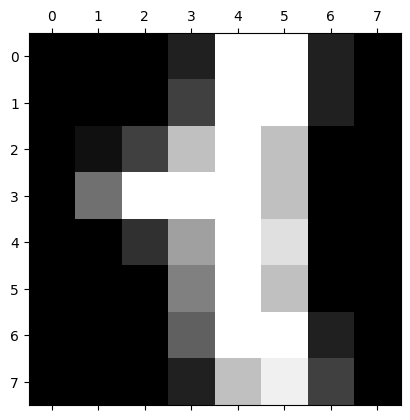

In [17]:
plt.gray()
plt.matshow(digits.images[21])
plt.show()

<Figure size 640x480 with 0 Axes>

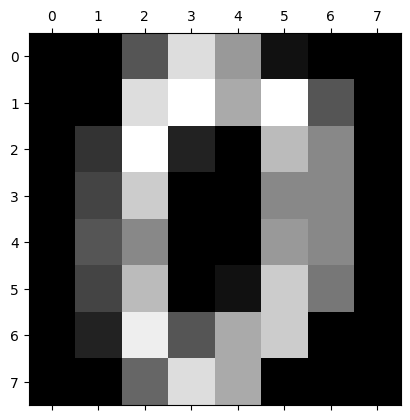

<Figure size 640x480 with 0 Axes>

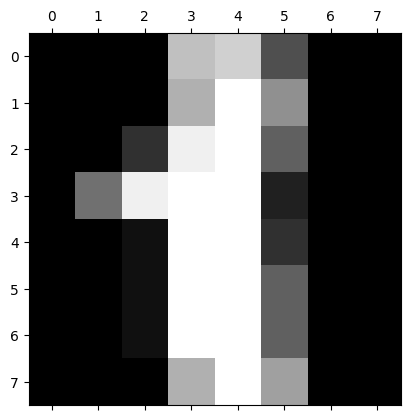

<Figure size 640x480 with 0 Axes>

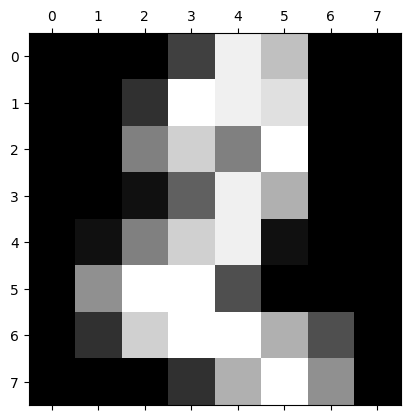

<Figure size 640x480 with 0 Axes>

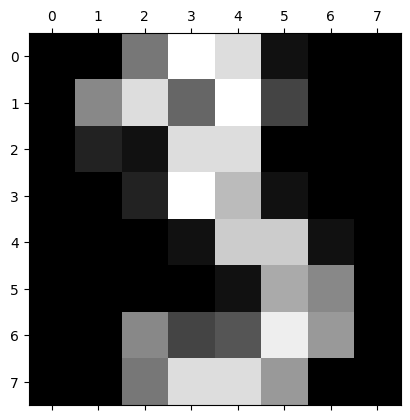

<Figure size 640x480 with 0 Axes>

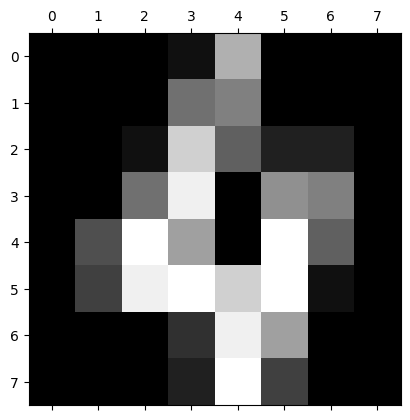

<Figure size 640x480 with 0 Axes>

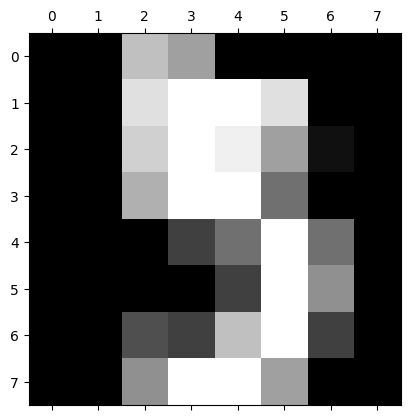

<Figure size 640x480 with 0 Axes>

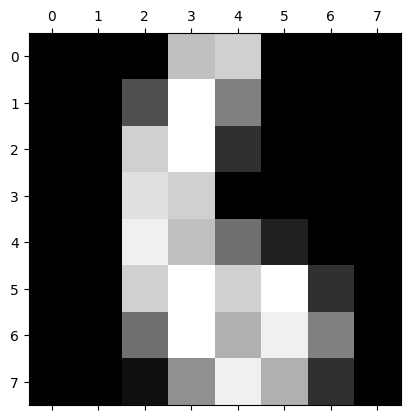

<Figure size 640x480 with 0 Axes>

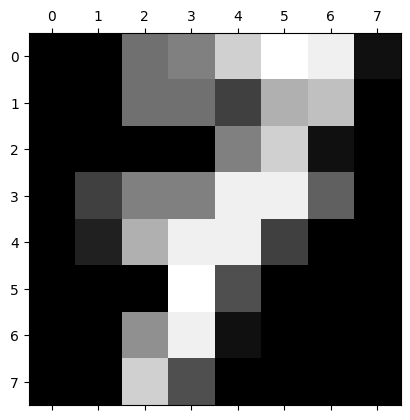

<Figure size 640x480 with 0 Axes>

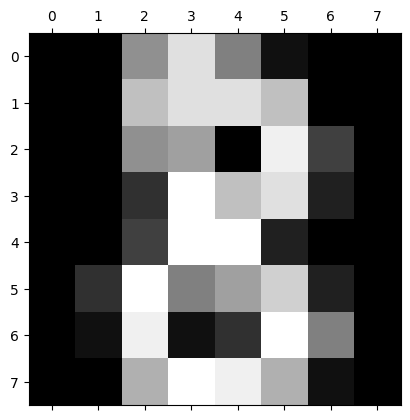

<Figure size 640x480 with 0 Axes>

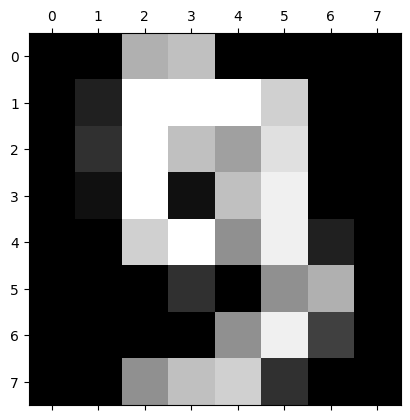

In [18]:
for i in range(10):
    plt.gray()
    plt.matshow(digits.images[i])
    plt.show()

#### Convert data into Pandas DataFrame

In [19]:
df=pd.DataFrame(digits.data,columns=digits.feature_names)
df['target']=digits.target

# DESCRIBE DATA

In [20]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

# DATA VISUALIZATION

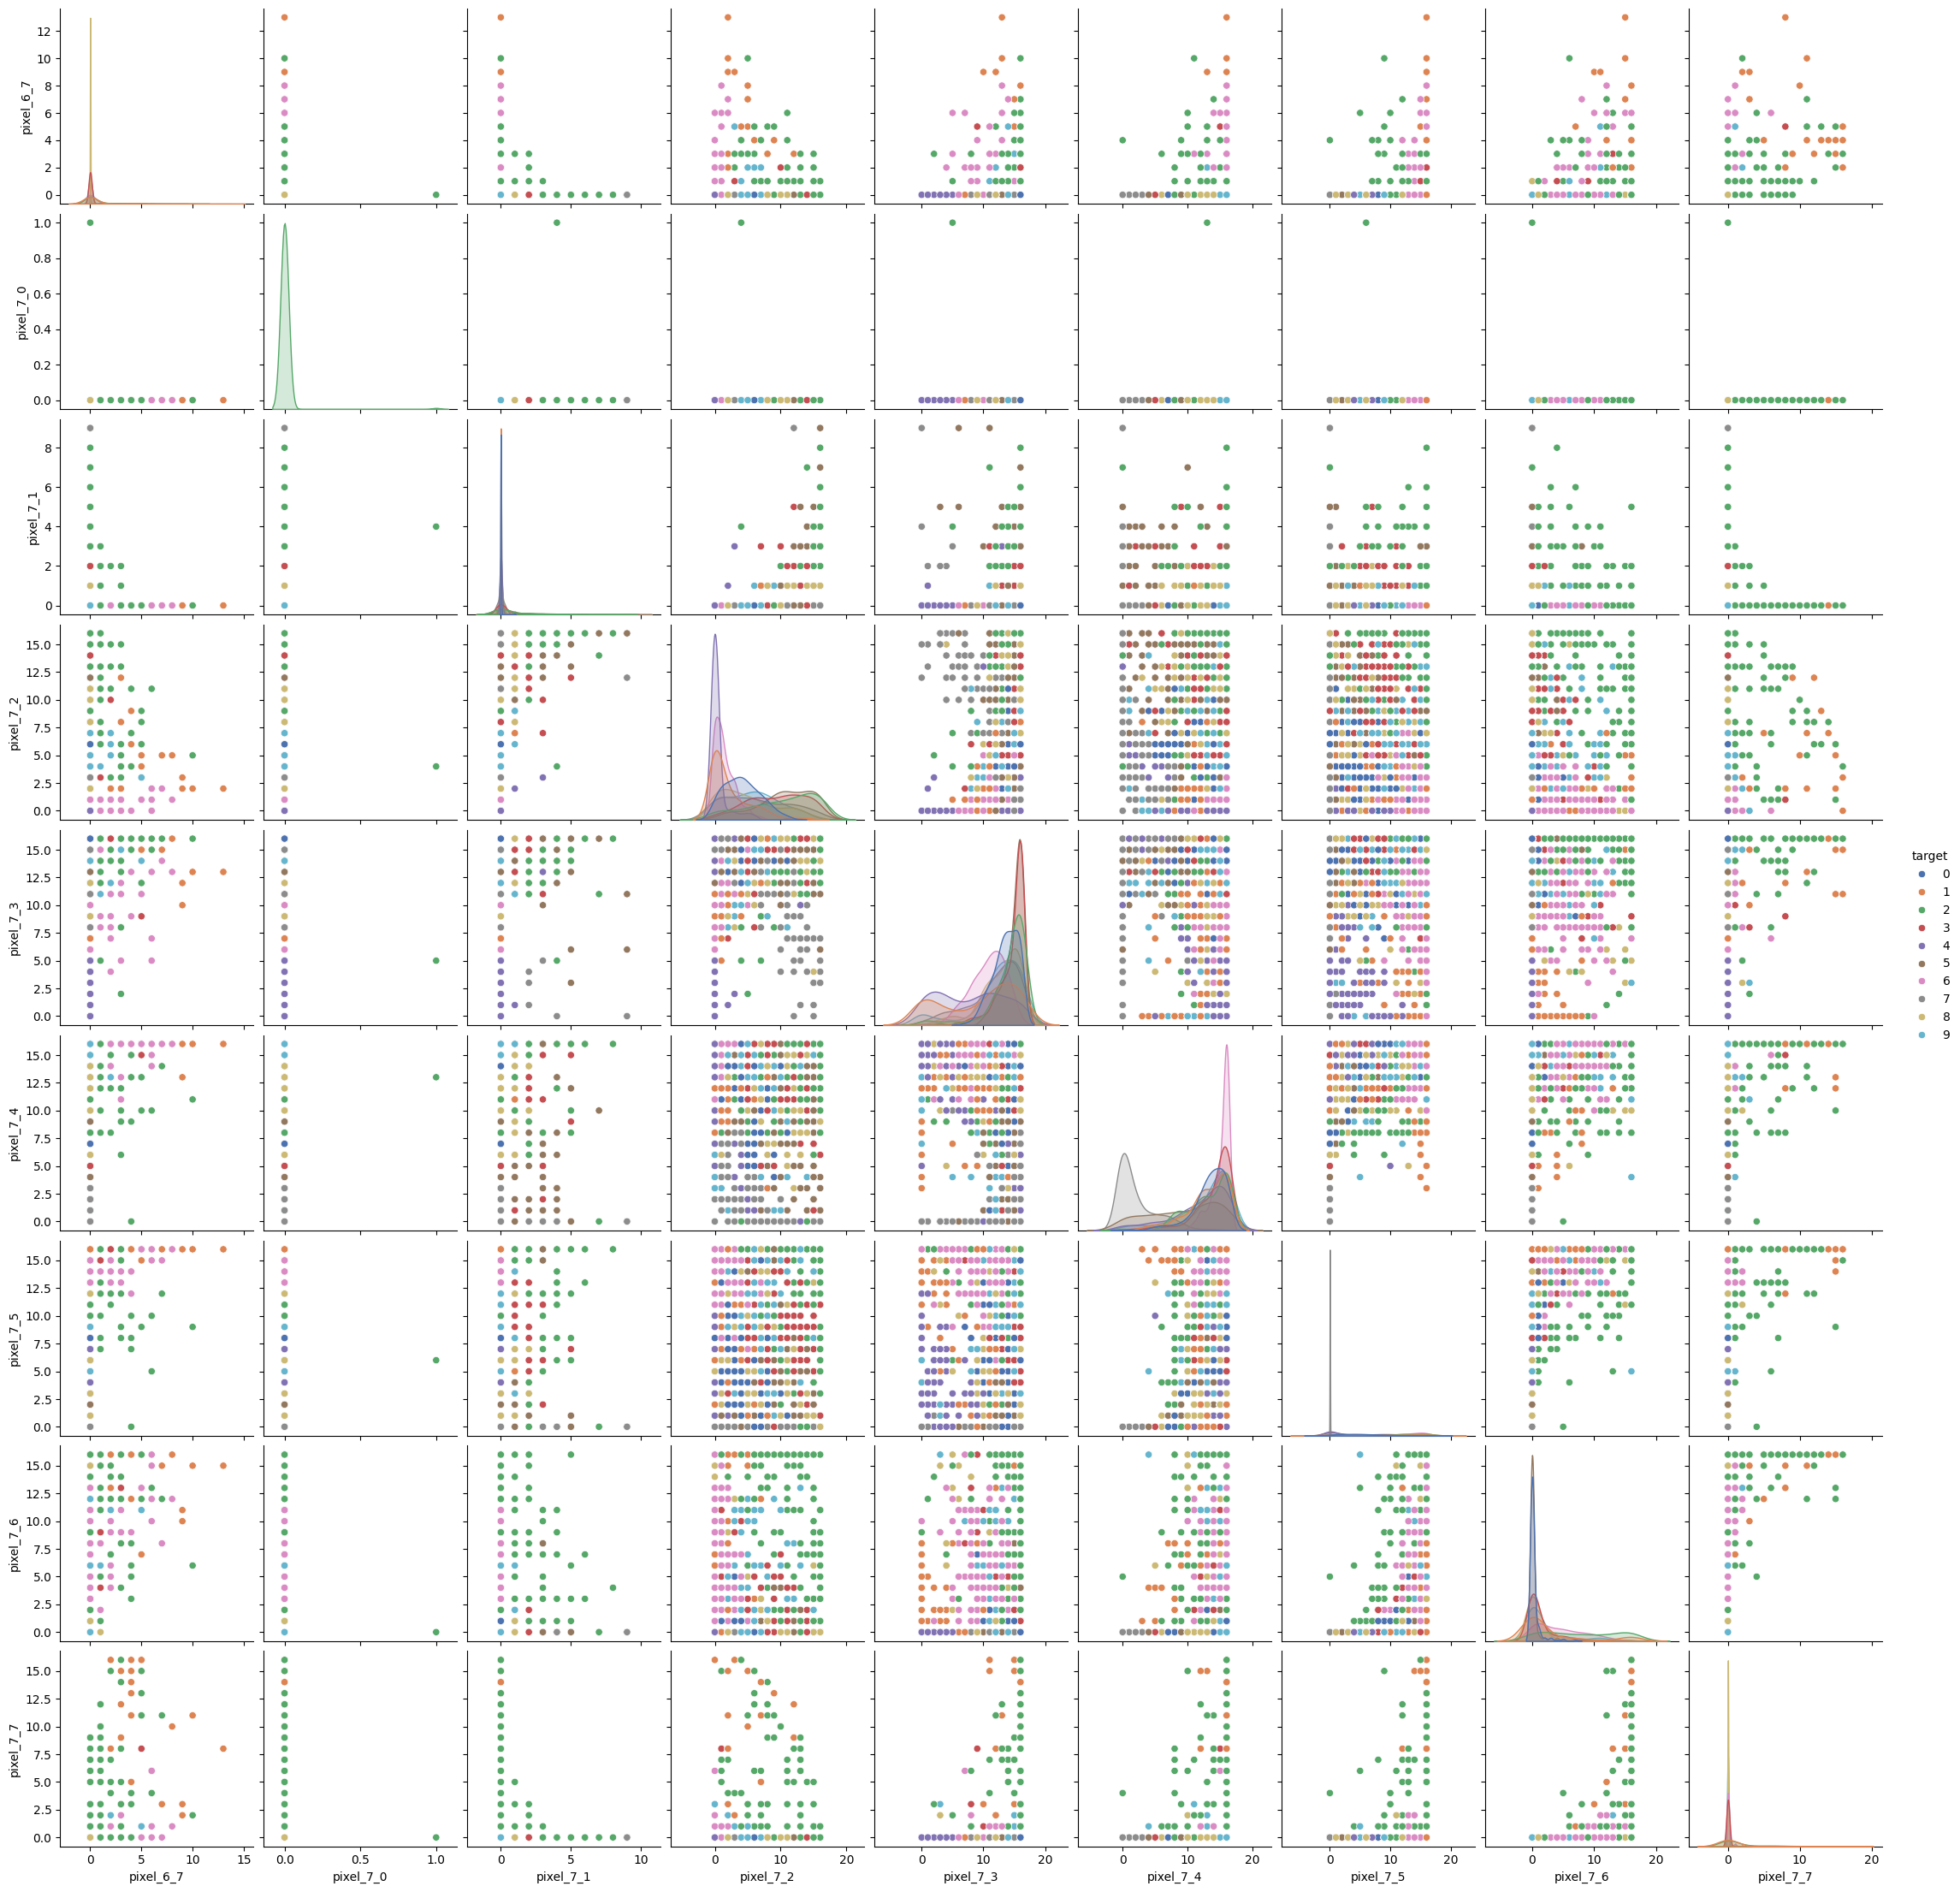

In [22]:
sns.pairplot(df.iloc[:,55:],hue='target',palette='deep')

In [23]:
counts=df.target.value_counts()
counts

,count
target,
3,183
1,182
5,182
4,181
6,181
9,180
7,179
0,178
2,177


<ipython-input-24-3a4e5fb3bfaf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'],saturation=1,palette='husl')


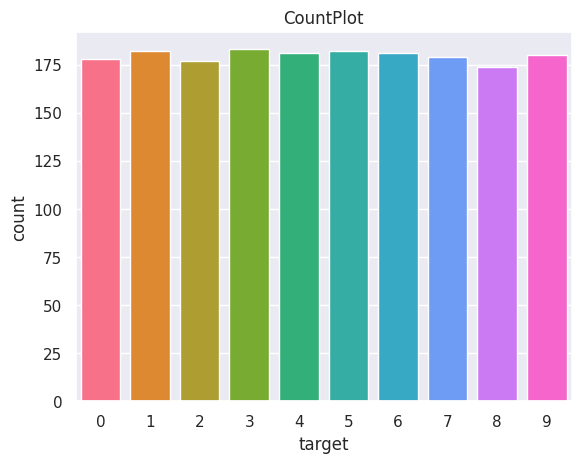

In [24]:
sns.set(style='darkgrid')
sns.countplot(x=df['target'],saturation=1,palette='husl')
plt.title('CountPlot')
plt.show()

# Define Target Variable (y) and Feature Variables (X)

In [25]:
x=df
y=digits.target

# TRAIN-TEST SPLIT

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

In [28]:
xtrain.shape, xtest.shape , ytrain.shape, ytest.shape

((1437, 65), (360, 65), (1437,), (360,))

# MODELlING

In [29]:
svm=SVC()

In [30]:
svm.fit(xtrain,ytrain)
svm.score(xtest,ytest)

0.9861111111111112

### Finding best values of random state for train_test_split

In [31]:
acc=[]
for i in range(1,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=i)
    svm=SVC()
    svm.fit(xtrain,ytrain)
    print(f"value={i} and accuracy={svm.score(xtest,ytest)}")
    acc.append(svm.score(xtest,ytest))
maxAcc=max(acc)
random_state=acc.index(maxAcc)+1
print("=============================================================")
print("=============================================================")
print(f"Best value={random_state} and Best accuracy={maxAcc}")
print("=============================================================")
print("=============================================================")

value=1 and accuracy=0.9916666666666667
value=2 and accuracy=0.9833333333333333
value=3 and accuracy=0.9916666666666667
value=4 and accuracy=0.9944444444444445
value=5 and accuracy=0.9805555555555555
value=6 and accuracy=0.9861111111111112
value=7 and accuracy=0.9944444444444445
value=8 and accuracy=0.9888888888888889
value=9 and accuracy=0.9916666666666667
value=10 and accuracy=0.9888888888888889
value=11 and accuracy=0.9861111111111112
value=12 and accuracy=0.9916666666666667
value=13 and accuracy=0.9888888888888889
value=14 and accuracy=0.9972222222222222
value=15 and accuracy=0.9888888888888889
value=16 and accuracy=0.9944444444444445
value=17 and accuracy=0.9861111111111112
value=18 and accuracy=0.9944444444444445
value=19 and accuracy=0.9805555555555555
value=20 and accuracy=0.9888888888888889
value=21 and accuracy=0.9944444444444445
value=22 and accuracy=0.9972222222222222
value=23 and accuracy=0.9972222222222222
value=24 and accuracy=0.9944444444444445
value=25 and accuracy=0.9

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.33,random_state=random_state)

In [33]:
svm=SVC()
svm.fit(xtrain,ytrain)
svm.score(xtest,ytest)

0.9966329966329966

# MODEL EVALUATION

In [37]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
pred = grid.predict(xtest)
print(confusion_matrix(ytest, pred))

{'C': 0.1, 'gamma': 0.1}
SVC(C=0.1, gamma=0.1)
0.10640041493775935
[[ 0  0  0  0 63  0  0  0  0  0]
 [ 0  0  0  0 70  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0 65  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  0 52  0  0  0  0  0]
 [ 0  0  0  0 62  0  0  0  0  0]]


In [38]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00        70
           2       0.00      0.00      0.00        55
           3       0.00      0.00      0.00        60
           4       0.09      1.00      0.16        53
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        65
           7       0.00      0.00      0.00        54
           8       0.00      0.00      0.00        52
           9       0.00      0.00      0.00        62

    accuracy                           0.09       594
   macro avg       0.01      0.10      0.02       594
weighted avg       0.01      0.09      0.01       594



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PREDICTION

In [39]:
pred=svm.predict(xtest)
pred[:20]

array([4, 5, 8, 8, 9, 0, 7, 5, 1, 8, 5, 7, 2, 7, 2, 8, 2, 0, 5, 1])

In [40]:
ytest[:20]

array([4, 5, 8, 8, 9, 0, 7, 5, 1, 8, 5, 7, 2, 7, 2, 8, 2, 0, 5, 1])

### Confusion Matrix and Classification Report

In [41]:
print ("Confusion matrix")
print(confusion_matrix(ytest,pred))

Confusion matrix
[[63  0  0  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0 59  1  0  0  0]
 [ 0  0  0  0  0  0 65  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  0  0  0  0  0  0  0 52  0]
 [ 0  0  0  0  0  0  0  0  1 61]]


In [42]:
print("EVALUATION ON TESTING DATA")
print(classification_report(ytest,pred))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        53
           5       1.00      0.98      0.99        60
           6       0.98      1.00      0.99        65
           7       1.00      1.00      1.00        54
           8       0.98      1.00      0.99        52
           9       1.00      0.98      0.99        62

    accuracy                           1.00       594
   macro avg       1.00      1.00      1.00       594
weighted avg       1.00      1.00      1.00       594



### Hyper Parameters Tuning

In [43]:
C= [0.1, 1, 10, 100, 1000]
gamma= [1, 0.1, 0.01, 0.001, 0.0001]
kernel= ['rbf']
param_grid = {
    'C':C,
    'gamma':gamma,
    'kernel':kernel
 }

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.108 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.108 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.104 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.104 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.108 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.108 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.108 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.104 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.104 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.108 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.108 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)